In [ ]:
#Hierarchical clustering
#Hierarchical clustering is a method which seeks to build a hierarchy of clusters. Strategies for hierarchical clustering 
# generally fall into 2 types:
#                              1. Agglomerative: A "bottom-up" approach. Each observation starts in its own cluster, and pairs
#                                   of cluters are merged as one moves up the gierarchy
#                              2. Devisive: A "top-down" approach. All observations start in one cluster and splits are performed
#                                   recursively as one moves down the hierarchy
#In general, the merges and splits are determined in a greddy manner, and the result of hierarchical clustering
# are usually presented in a dendrogram

In [ ]:
#Agglomerative Clustering:
# 1. Compute the proximity matrix
# 2. Let each data point be a cluster
# 3. Repeat: Merge two clost clusters and update the proximity matrix until 1/K cluster ramains

In [ ]:
#Computation of Proximity/Distance Matrix
#To calculate the proximity between two clusters, we need to define the distance between them. Usually the distance is one
# of the following:
#                  - The maximum distance between elements of each cluster (complete-linkage clustering)
#                  - The minimum distance between elements of each cluster (single-linkage clustering)
#                  - The mean distance between elements of each cluster (average linkage clustering)
#                  - The sum of all intra-cluster variance

In [1]:
#Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 18, 8
sns.set_style('darkgrid')

In [4]:
#load in the data set
credit_df = pd.read_csv('cc.csv')
credit_df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
########################################## DATA EXPLORATION ###################################################################

In [6]:
#Statistical data about the data set
credit_df.describe()

#The min and max values from the statistical table seem reasonable with no outstanding error

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [7]:
#General information about the data set
credit_df.info()

#There are a total of 8950 objects spanning over 18 attributes. Apart from Cust_ID which is an object, every other attribute
# is either a floating point values or intergers. 
#We can also see that there are some columns that have null values, these are: CREDIT_LIMIT and MINIMUM_PAYMENTS.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
################################################### DATA PROCESSING ##########################################################

In [8]:
#First we will delete the CUST_ID attribute since it doesn't bring any true value to our data analysis and modelling.
credit_df.drop('CUST_ID', axis = 1, inplace = True)
credit_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [9]:
#Now we will deal with the null values seen previously in the CREDIT_LIMIT and MINIMUM_PAYMENTS columns.
# We will use the mean of each attribute to fill in the values
credit_df['MINIMUM_PAYMENTS'].fillna(value = credit_df['MINIMUM_PAYMENTS'].mean(), inplace = True)
credit_df['CREDIT_LIMIT'].fillna(value = credit_df['CREDIT_LIMIT'].mean(), inplace = True)
credit_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [10]:
credit_df.info()
#There are no more null values in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [12]:
#We can also use .isnull().sum() to check total null values in each column
credit_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

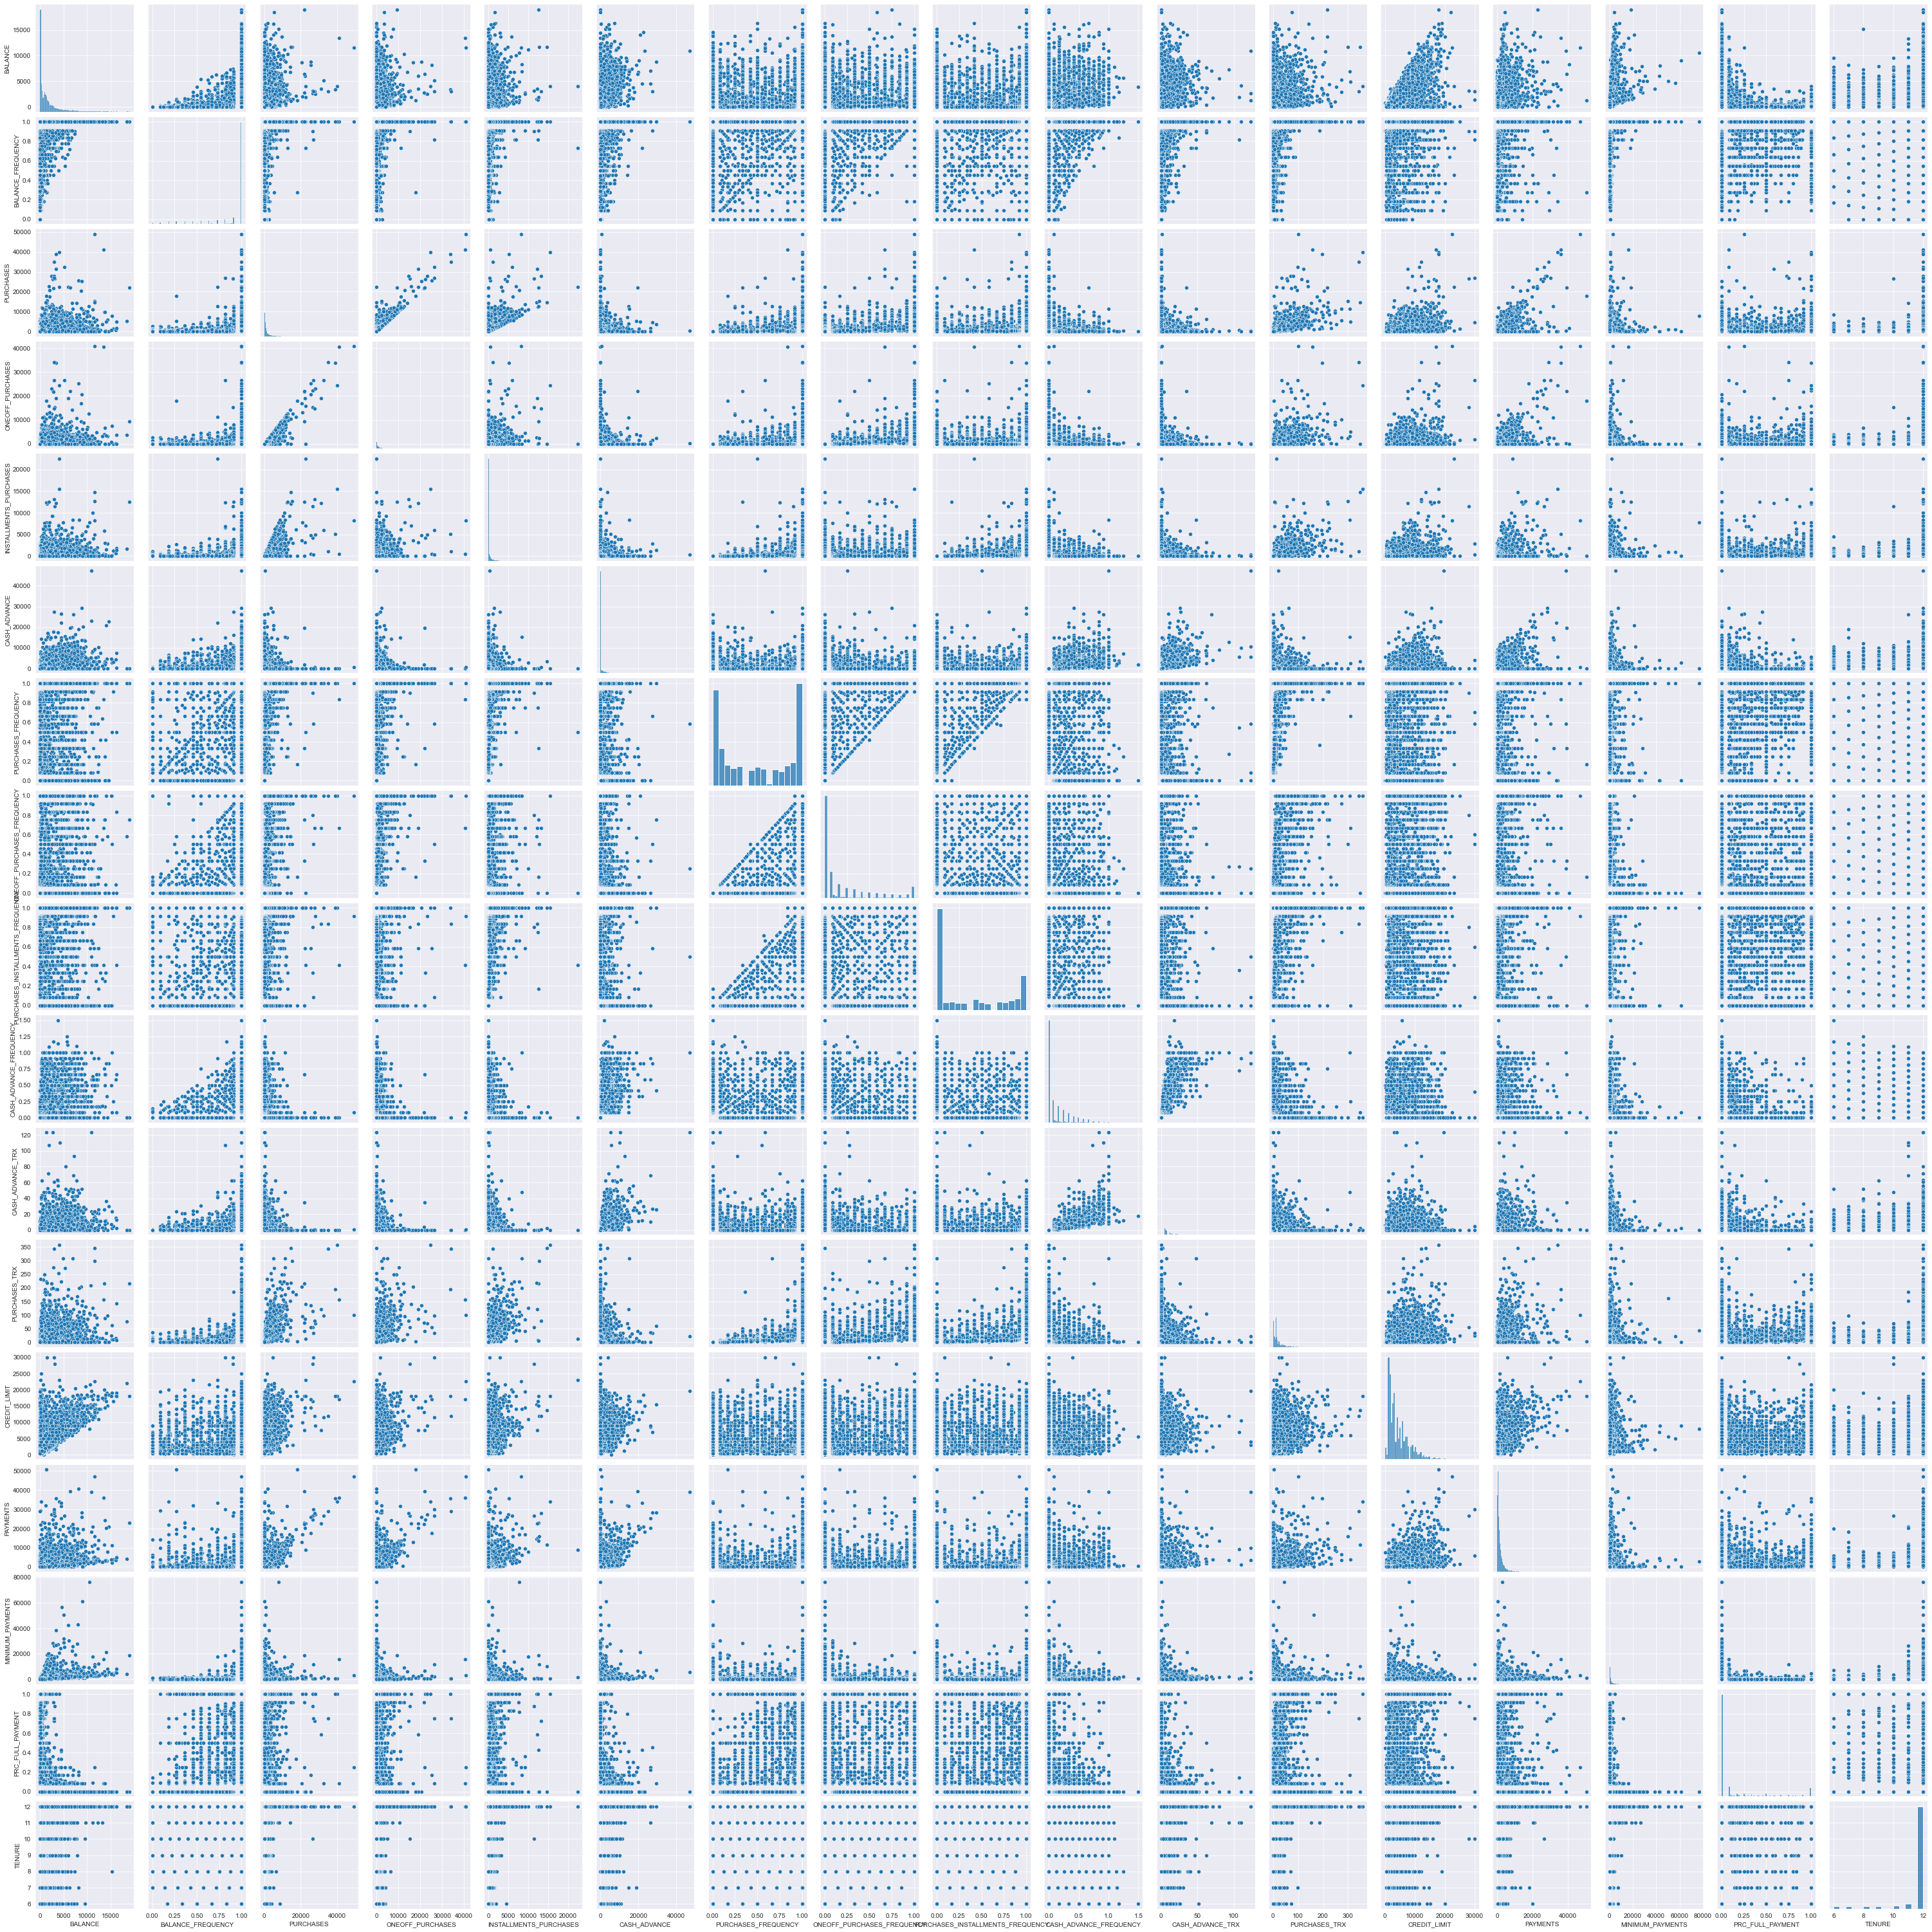

In [13]:
#Lets visualize the dataset a bit
sns.pairplot(credit_df)
plt.title("Pairplots of All Attributes")
plt.show()

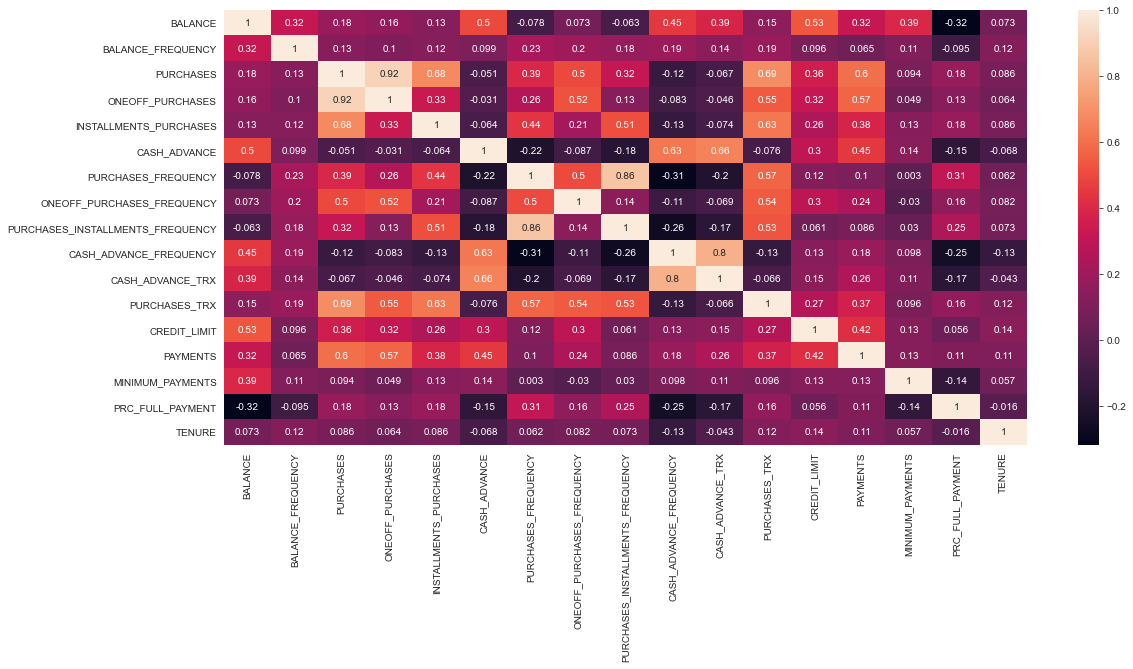

In [14]:
#check correlation matrix
sns.heatmap(credit_df.corr(), annot = True)
plt.title("Credit Card Correlation Heat Map")
plt.show()

#There is no outstanding correlation between independent variables

In [16]:
#Since the scale of the data varied quite a bit between different attributes, we will scale the data using Zscale and normalize
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler()
scaled_df = scaler.fit_transform(credit_df)

test1 = pd.DataFrame(scaled_df)
test1

0         1         2         3         4         5         6   \
0    -0.731989 -0.249434 -0.424900 -0.356934 -0.349079 -0.466786 -0.806490   
1     0.786961  0.134325 -0.469552 -0.356934 -0.454576  2.605605 -1.221758   
2     0.447135  0.518084 -0.107668  0.108889 -0.454576 -0.466786  1.269843   
3     0.049099 -1.016953  0.232058  0.546189 -0.454576 -0.368653 -1.014125   
4    -0.358775  0.518084 -0.462063 -0.347294 -0.454576 -0.466786 -1.014125   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.737950  0.518084 -0.333293 -0.356934 -0.132643 -0.466786  1.269843   
8946 -0.742423  0.518084 -0.329136 -0.356934 -0.122823 -0.466786  1.269843   
8947 -0.740398 -0.185477 -0.401965 -0.356934 -0.294893 -0.466786  0.854576   
8948 -0.745174 -0.185477 -0.469552 -0.356934 -0.454576 -0.449352 -1.221758   
8949 -0.572575 -0.889033  0.042146  0.301732 -0.454576 -0.406205  0.439310   

            7         8         9         10        11        12        13  \
0    -0.678661 -0.707313 -0.675349 -0.476070 -0.511333 -0.960433 -0.528979   
1    -0.678661 -0.916995  0.573963  0.110074 -0.591796  0.688639  0.818642   
2     2.673451 -0.916995 -0.675349 -0.476070 -0.109020  0.826062 -0.383805   
3    -0.399319 -0.916995 -0.258913 -0.329534 -0.551565  0.826062 -0.598688   
4    -0.399319 -0.916995 -0.675349 -0.476070 -0.551565 -0.905464 -0.364368   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.678661  1.179833 -0.675349 -0.476070 -0.350408 -0.960433 -0.486217   
8946 -0.678661  1.179833 -0.675349 -0.476070 -0.350408 -0.960433 -0.503396   
8947 -0.678661  0.760469 -0.675349 -0.476070 -0.390639 -0.960433 -0.570615   
8948 -0.678661 -0.916995  0.157527 -0.182998 -0.591796 -1.097856 -0.580536   
8949  1.556082 -0.916995  0.990398 -0.182998  0.333524 -0.905464 -0.576869   

                14        15        16  
0    -3.109675e-01 -0.525551  0.360680  
1     8.931021e-02  0.234227  0.360680  
2    -1.016632e-01 -0.525551  0.360680  
3    -4.390474e-16 -0.525551  0.360680  
4    -2.657913e-01 -0.525551  0.360680  
...            ...       ...       ...  
8945 -3.498541e-01  1.183951 -4.122768  
8946 -4.390474e-16 -0.525551 -4.122768  
8947 -3.354655e-01  0.329200 -4.122768  
8948 -3.469065e-01  0.329200 -4.122768  
8949 -3.329464e-01 -0.525551 -4.122768  

[8950 rows x 17 columns]

In [17]:
normalized_df = normalize(scaled_df)
normalized_df = pd.DataFrame(data = normalized_df)
normalized_df

0         1         2         3         4         5         6   \
0    -0.311938 -0.106297 -0.181072 -0.152108 -0.148760 -0.198921 -0.343687   
1     0.219925  0.037539 -0.131222 -0.099749 -0.127037  0.728166 -0.341434   
2     0.126682  0.146783 -0.030504  0.030850 -0.128790 -0.132249  0.359771   
3     0.020589 -0.426439  0.097309  0.229034 -0.190618 -0.154587 -0.425253   
4    -0.151595  0.218909 -0.195238 -0.146744 -0.192075 -0.197234 -0.428504   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.146893  0.103128 -0.066344 -0.071050 -0.026403 -0.092916  0.252770   
8946 -0.151521  0.105735 -0.067173 -0.072846 -0.025067 -0.095266  0.259162   
8947 -0.156974 -0.039324 -0.085222 -0.075675 -0.062521 -0.098965  0.181181   
8948 -0.154320 -0.038411 -0.097240 -0.073918 -0.094139 -0.093057 -0.253016   
8949 -0.115207 -0.178881  0.008480  0.060711 -0.091465 -0.081732  0.088393   

            7         8         9         10        11        12        13  \
0    -0.289212 -0.301422 -0.287801 -0.202878 -0.217905 -0.409290 -0.225425   
1    -0.189660 -0.256265  0.160401  0.030761 -0.165384  0.192448  0.228779   
2     0.757440 -0.259802 -0.191339 -0.134880 -0.030888  0.234039 -0.108739   
3    -0.167447 -0.384524 -0.108570 -0.138184 -0.231288  0.346393 -0.251048   
4    -0.168727 -0.387463 -0.285359 -0.201157 -0.233056 -0.382591 -0.153959   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.135091  0.234852 -0.134432 -0.094764 -0.069751 -0.191180 -0.096784   
8946 -0.138507  0.240791 -0.137832 -0.097161 -0.071515 -0.196014 -0.102738   
8947 -0.143885  0.161230 -0.143183 -0.100933 -0.082821 -0.203625 -0.120978   
8948 -0.140545 -0.189902  0.032623 -0.037897 -0.122556 -0.227357 -0.120224   
8949  0.313098 -0.184508  0.199277 -0.036821  0.067108 -0.182188 -0.116071   

                14        15        16  
0    -1.325192e-01 -0.223964  0.153704  
1     2.495877e-02  0.065457  0.100796  
2    -2.880315e-02 -0.148899  0.102187  
3    -1.841058e-16 -0.220379  0.151244  
4    -1.123064e-01 -0.222064  0.152400  
...            ...       ...       ...  
8945 -6.964046e-02  0.235672 -0.820660  
8946 -8.960492e-17 -0.107259 -0.841413  
8947 -7.112317e-02  0.069795 -0.874082  
8948 -7.184155e-02  0.068175 -0.853792  
8949 -6.699181e-02 -0.105746 -0.829538  

[8950 rows x 17 columns]

In [19]:
#Reduce the dimensions of the data uing PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal.head()

P1        P2
0 -0.489826 -0.679678
1 -0.518791  0.545010
2  0.330885  0.268979
3 -0.482373 -0.092113
4 -0.563289 -0.481914

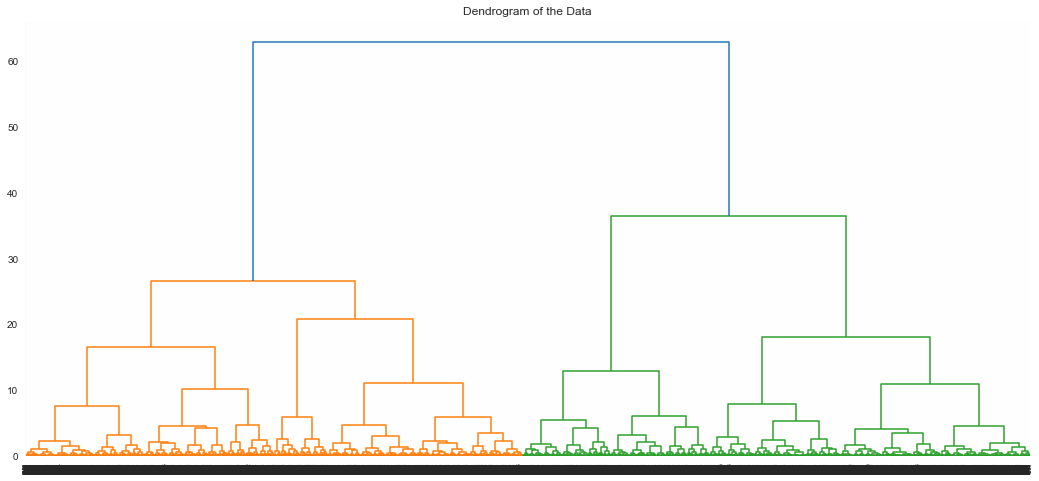

In [21]:
#Using a dendrogram to visualize the linkage of the reduced data using method = 'ward'
import scipy.cluster.hierarchy as shc

plt.title('Dendrogram of the Data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method = 'ward')))

In [ ]:
############################################ BUILDING THE MODEL ##############################################################

In [25]:
#We can also determine the optimal number of clusters using sihouette score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

#save scores for plotting
silhouette_scores = []

# testing different cluster values in range [2, 8)
for n_cluster in range(2, 8):
    silhouette_scores.append(silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal)))

In [ ]:
################################################ MODEL RESULT VISUALIZATION ###################################################

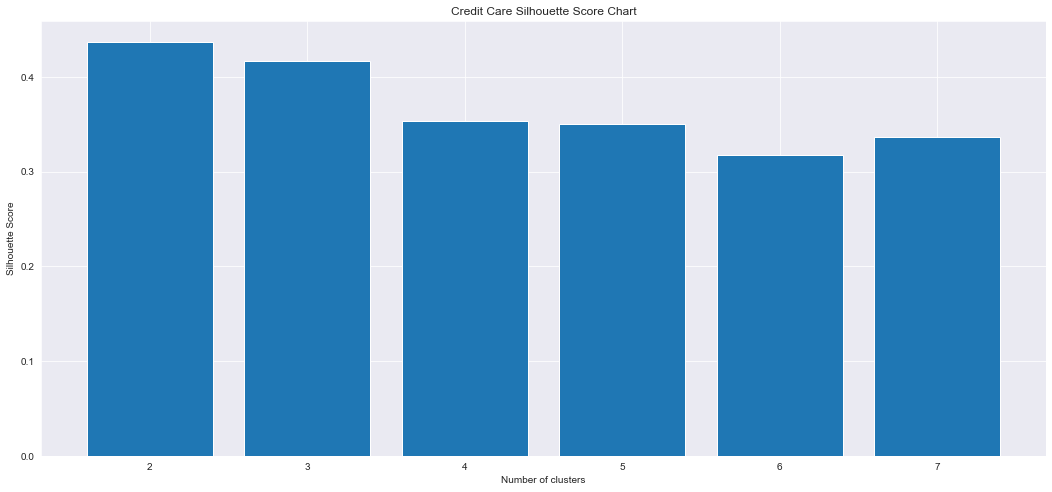

In [28]:
plt.bar(x = range(2, 8), height = silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Credit Care Silhouette Score Chart')
plt.show()

#Seems like n_cluster = 2 is the model with the highest silhoutte score (higher is better). Moreover, as we add more clusters,
# the performance of the model decreases

In [30]:
#Here we will use n_cluster = 3
agg = AgglomerativeClustering(n_clusters = 3)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=3)

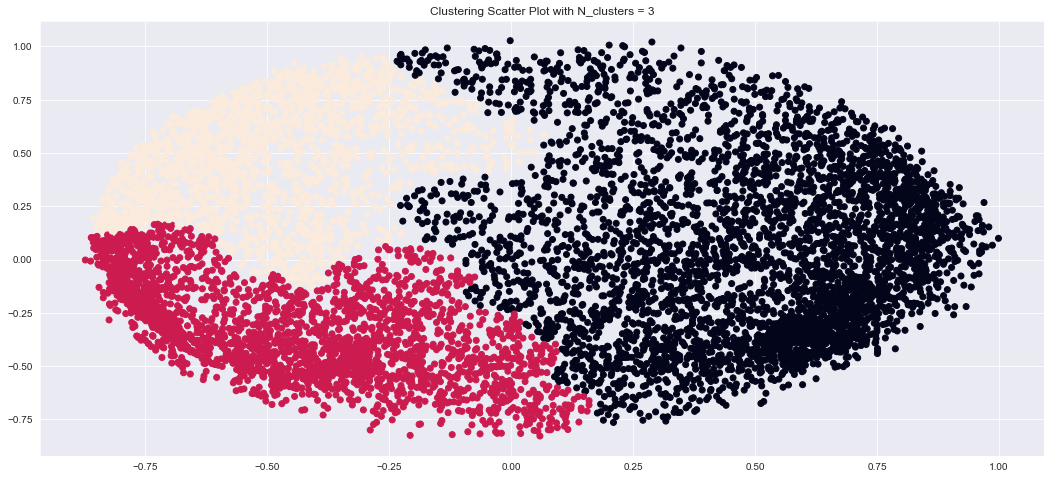

In [33]:
#Visualizing the cluster
plt.scatter(X_principal['P1'], X_principal['P2'], c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal))
plt.title('Clustering Scatter Plot with N_clusters = 3')
plt.show()

In [ ]:
############################################ TESTING THE MODEL WITH DIFFERENT CLUSTERS ######################################

In [34]:
#Here we will try n_cluster = 5
agg = AgglomerativeClustering(n_clusters = 5)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=5)

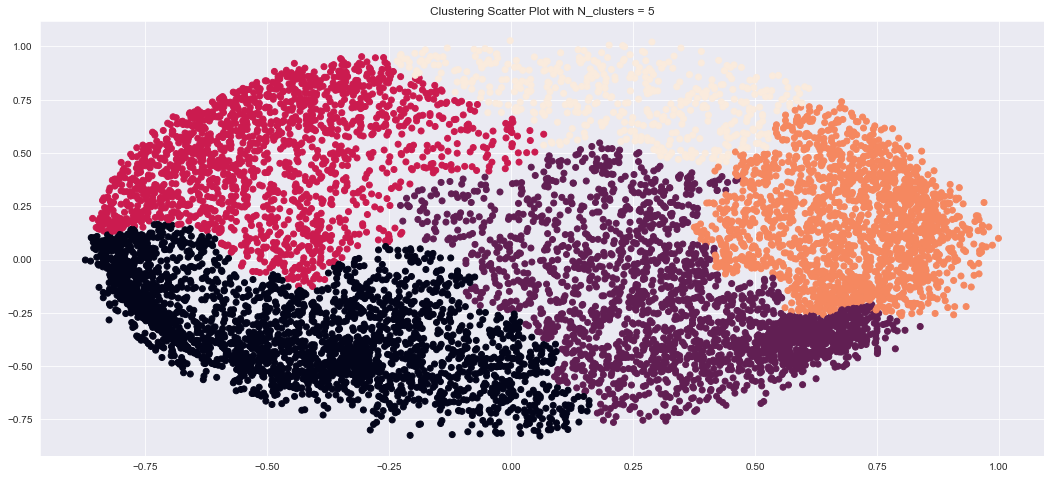

In [35]:
#Visualizing the clusters
plt.scatter(X_principal['P1'], X_principal['P2'], c = AgglomerativeClustering(n_clusters = 5).fit_predict(X_principal))
plt.title('Clustering Scatter Plot with N_clusters = 5')
plt.show()

In [36]:
#Testing if the more cluster the better the result or less since there will be a point where each point is its own cluster,
# at that point, shouldn't the silhouette point be maximum?

#save scores for plotting
silhouette_scores = []

# testing different cluster values in range [10, 40)
for n_cluster in range(10, 40):
    silhouette_scores.append(silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal)))

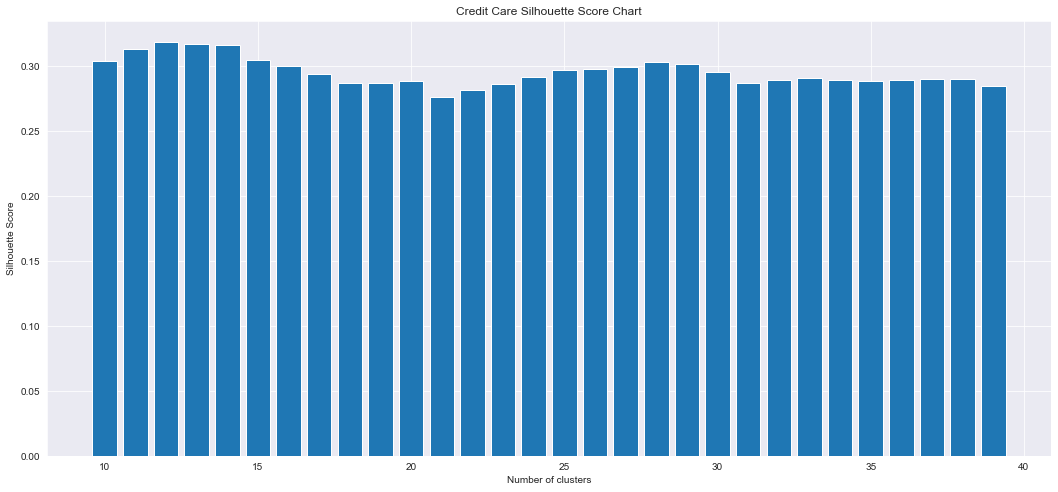

In [37]:
plt.bar(x = range(10, 40), height = silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Credit Care Silhouette Score Chart')
plt.show()
#Still lower than before

In [40]:
#save scores for plotting
silhouette_scores = []

# testing different cluster values in range [10, 40)
for n_cluster in range(8920, 8950):
    silhouette_scores.append(silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal)))

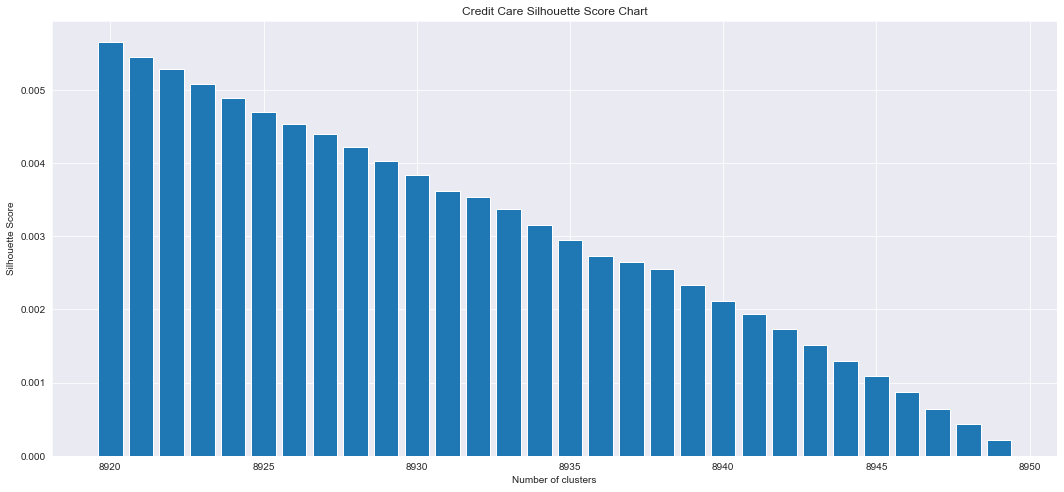

In [41]:
plt.bar(x = range(8920, 8950), height = silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Credit Care Silhouette Score Chart')
plt.show()
#My hypothesis was incorrect.